In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("xSigmoid_benchmark.csv")
df.steps = df.steps.apply(eval)
df

,algorithm,heuristics,steps
0,BFS,none,"[52, 15, 74, 157, 60, 19, 38, 31, 121, 71, 68,..."
1,BFS,FVC,"[71, 103, 131, 163, 71, 147, 163, 135, 115, 16..."
2,BFS,AED,"[111, 74, 65, 117, 26, 64, 20, 36, 88, 24, 33,..."
3,BFS,AEQD,"[46, 46, 46, 46, 78, 46, 46, 78, 46, 46, 46, 7..."
4,BFS,SMD,"[18, 18, 19, 18, 18, 18, 19, 19, 18, 50, 82, 5..."
5,ID-DLS,none,"[162, 107, 8, 7, 58, 58, 110, 4, 54, 9, 33, 32..."
6,ID-DLS,FVC,"[161, 161, 115, 102, 74, 111, 107, 70, 136, 81..."
7,ID-DLS,AED,"[44, 86, 56, 132, 11, 60, 44, 96, 29, 29, 75, ..."
8,ID-DLS,AEQD,"[38, 71, 71, 71, 38, 38, 71, 71, 38, 38, 71, 3..."
9,ID-DLS,SMD,"[43, 42, 9, 9, 42, 43, 42, 9, 42, 9, 10, 9, 43..."


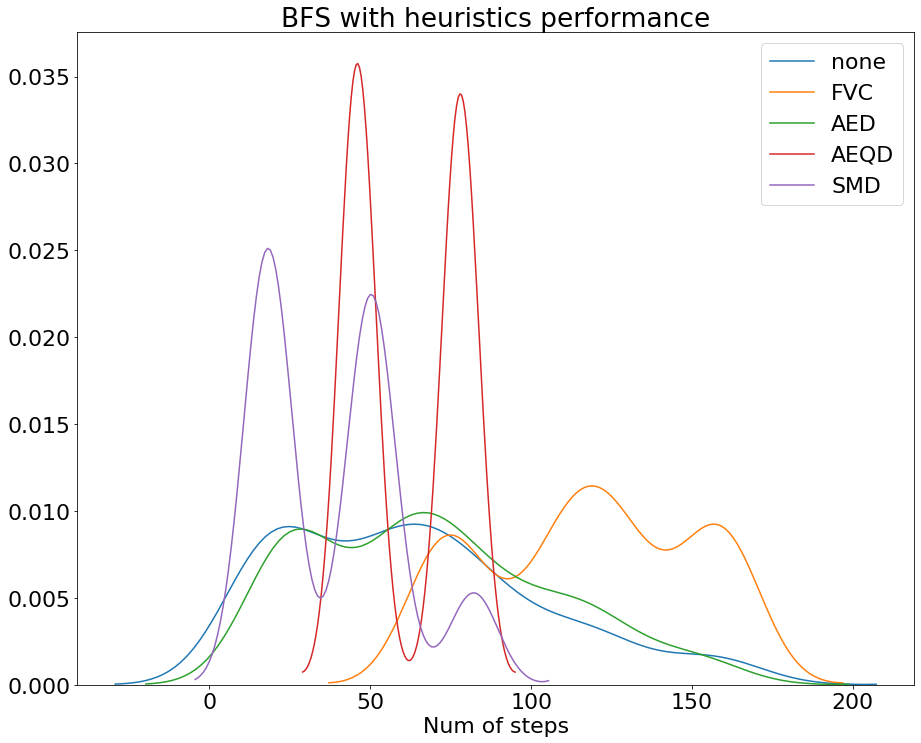

In [3]:
df_bfs = df[df.algorithm == "BFS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");

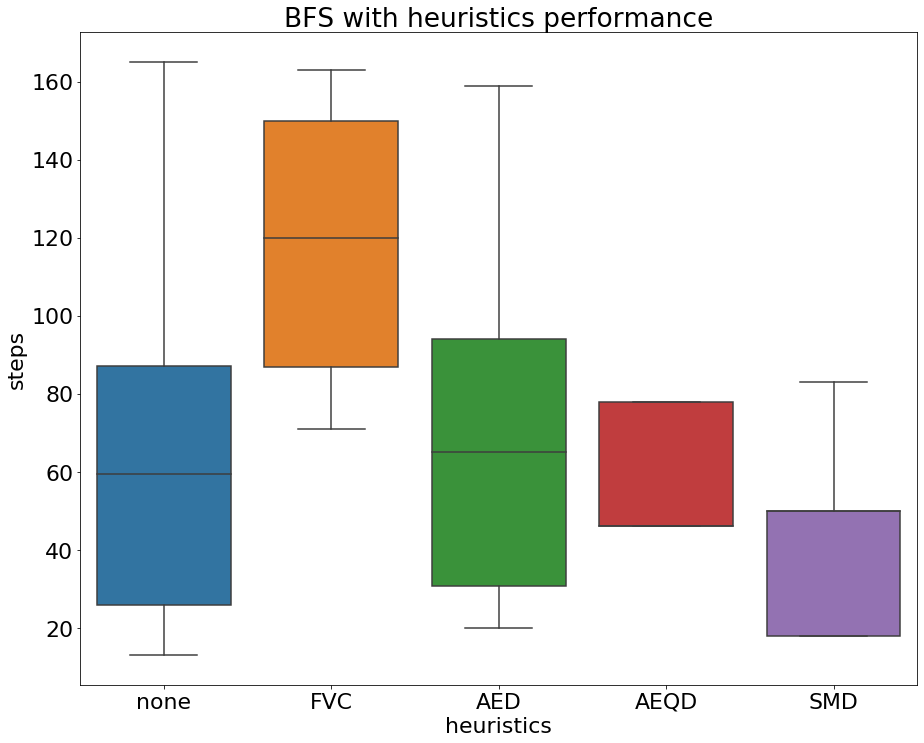

In [4]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_bfs.explode("steps"))
plt.title("BFS with heuristics performance");

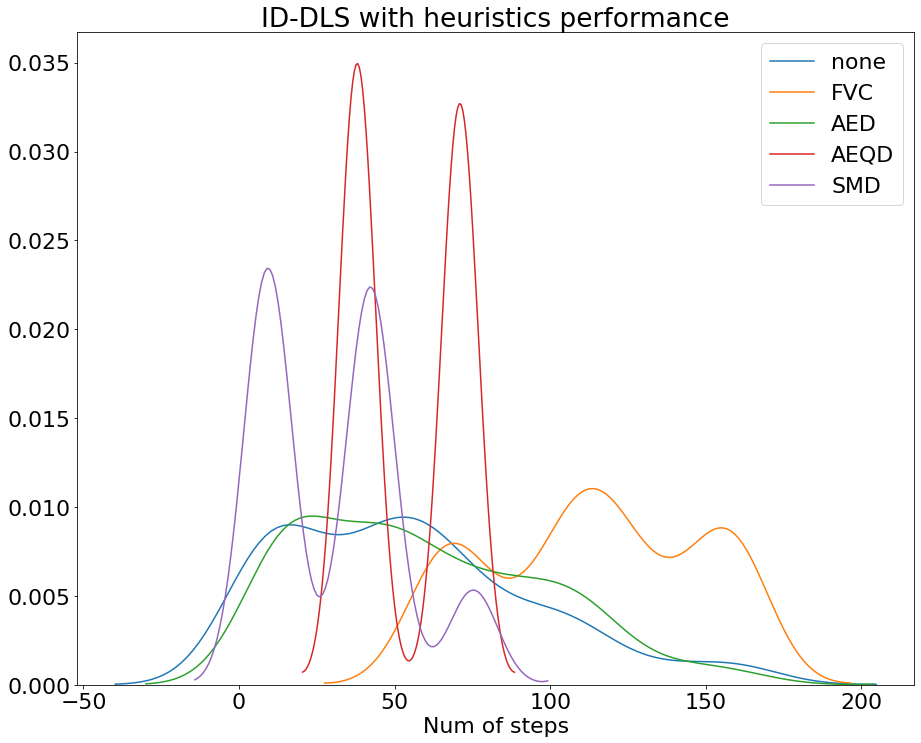

In [5]:
df_iddls = df[df.algorithm == "ID-DLS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");

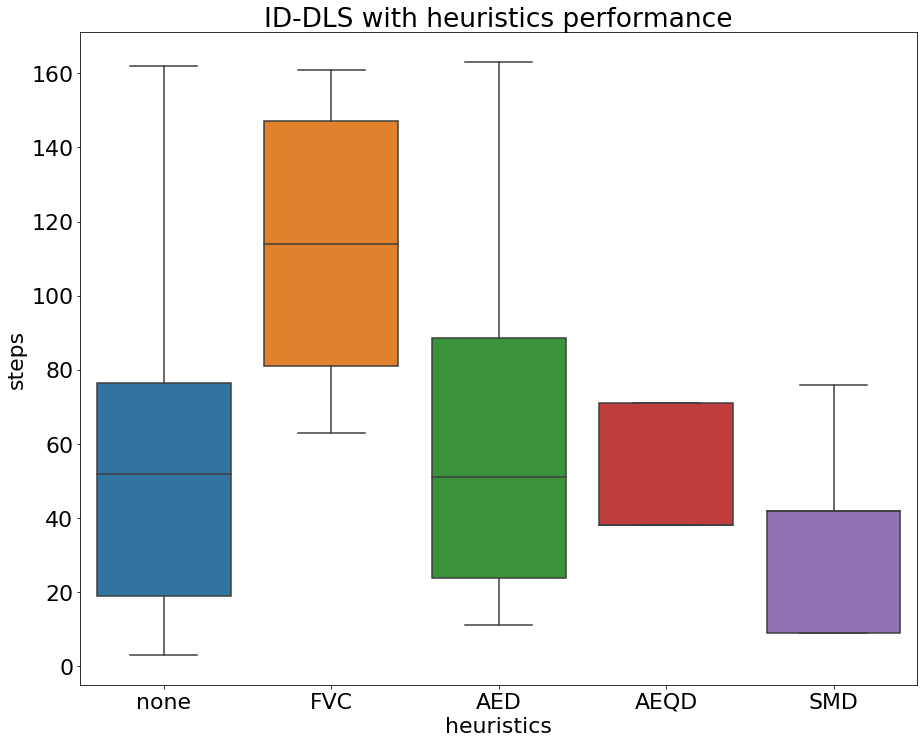

In [6]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_iddls.explode("steps"))
plt.title("ID-DLS with heuristics performance");

c:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


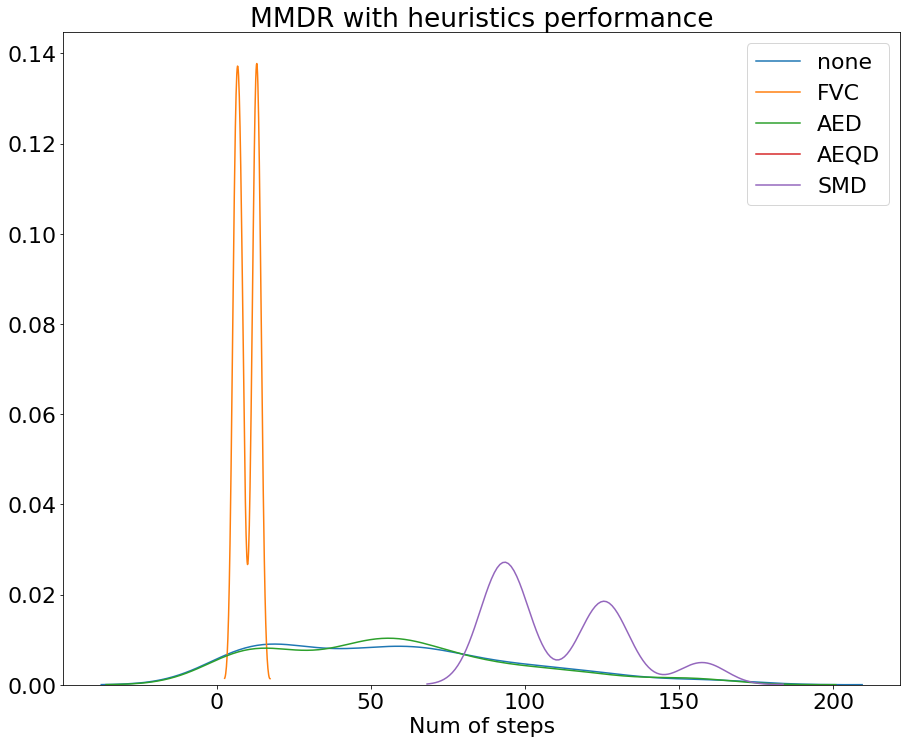

In [7]:
df_mmdr = df[df.algorithm == "MMDR"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_mmdr[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)

plt.legend()
plt.xlabel("Num of steps")
plt.title("MMDR with heuristics performance");

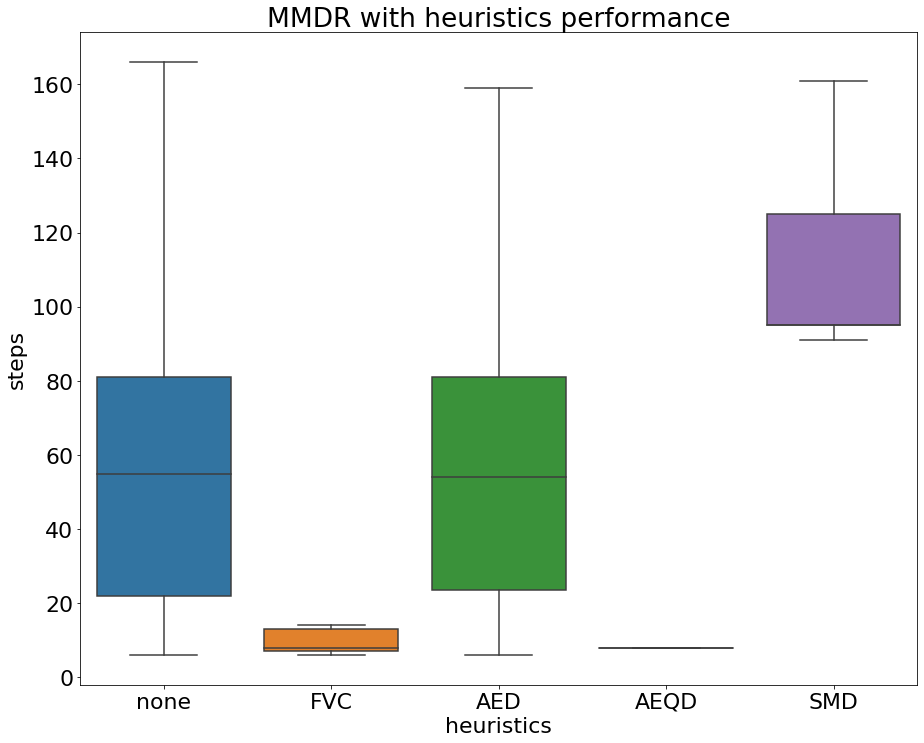

In [8]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_mmdr.explode("steps"))
plt.title("MMDR with heuristics performance");

c:\python\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


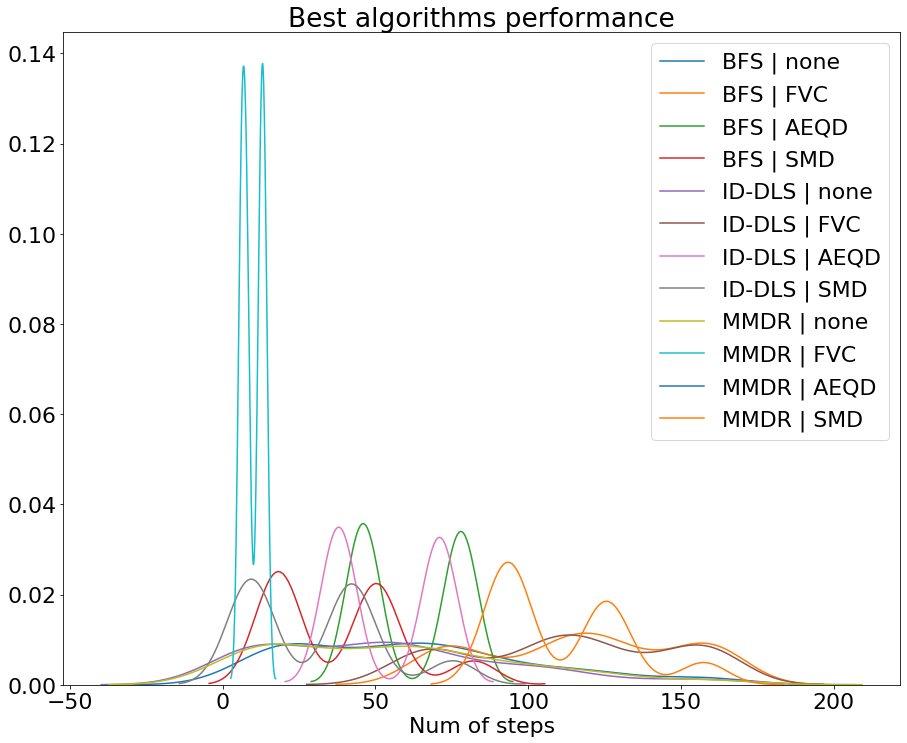

In [9]:
df_best = df[(df.heuristics.isin(["none", "AEQD", "SMD", "FVC"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_best.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


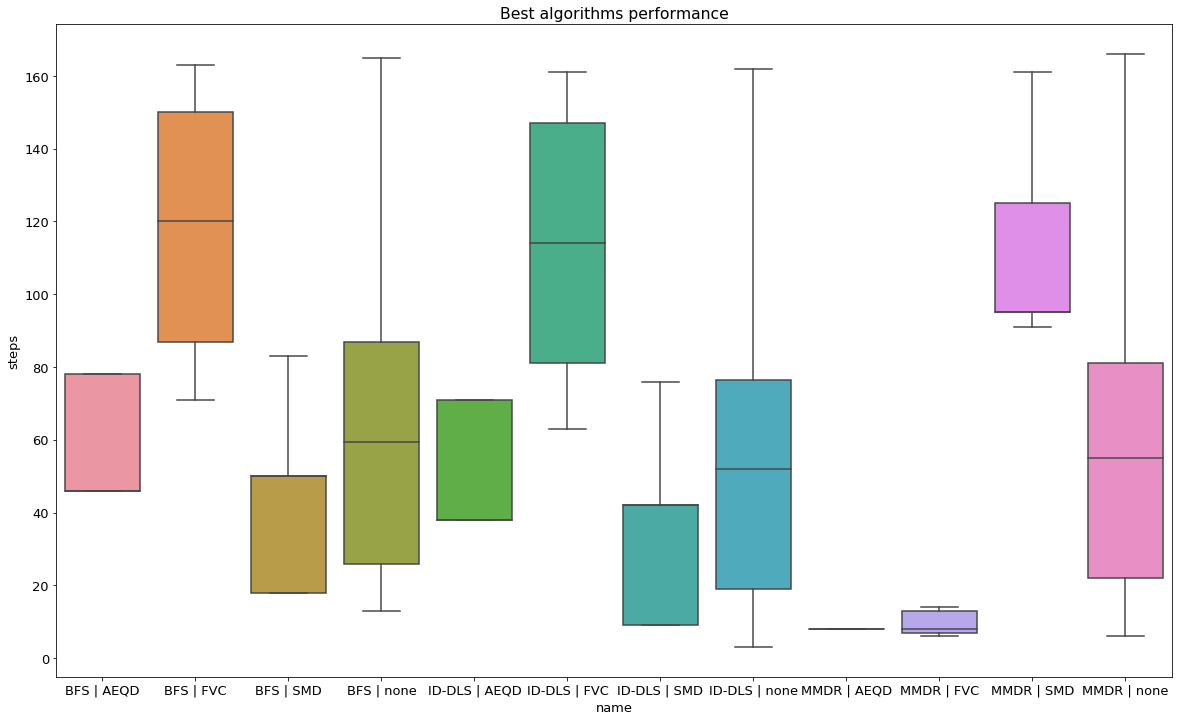

In [14]:
plt.figure(figsize=(20, 12))
plt.rcParams.update({'font.size': 13})
df_best["name"] = df_best.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_best.explode("steps").sort_values(by=["algorithm", "heuristics"]))
plt.title("Best algorithms performance");

In [15]:
bfs_none = df[(df.algorithm == "BFS") & (df.heuristics == "none")].steps.values[0]
smd_iddls = df[(df.algorithm == "ID-DLS") & (df.heuristics == "SMD")].steps.values[0]
mmdr_fvc = df[(df.algorithm == "MMDR") & (df.heuristics == "FVC")].steps.values[0]
mmdr_aeqd = df[(df.algorithm == "MMDR") & (df.heuristics == "AEQD")].steps.values[0]

print(f"BFS: {np.mean(bfs_none)} +- {np.std(bfs_none)}")
print(f"SMD ID-DLS: {np.mean(smd_iddls)} +- {np.std(smd_iddls)}")
print(f"FVC MMDR: {np.mean(mmdr_fvc)} +- {np.std(mmdr_fvc)}")
print(f"AEQD MMDR: {np.mean(mmdr_aeqd)} +- {np.std(mmdr_aeqd)}")


BFS: 63.5375 +- 39.7410190326066
SMD ID-DLS: 30.595833333333335 +- 21.796578079419305
FVC MMDR: 9.854166666666666 +- 3.1608911146841
AEQD MMDR: 8.0 +- 0.0


In [17]:
print("Total speedup:", np.mean(bfs_none) / np.mean(mmdr_aeqd))



Total speedup: 7.9421875
